<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch3_1~5_pg_147~174_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[CHAPTER 03] 평가**
---

**성능 평가 지표**

(회귀/분류 에 따라 여러 종류로 나뉨)

**분류의 성능 평가 지표**:

-정확도(Accuracy)

-오차행렬(Confusion Matrix)

-정밀도(Precision)

-재현율(Recall)

-F1 스코어

-ROC AUC

## **01 정확도(Accuracy)**

---

정확도: 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

정확도 = (예측 결과가 동일한 데이터 건수)/(전체 예측 데이터 건수)

<u>이진 분류</u>(binary classification)(2개의 결괏값만을 가지는 분류)의 경우 ML 모델의 성능이 왜곡될 수 있어 하나만 가지고 성능 평가 X

특히 <u>불균형한</u>(imbalanced) 레이블 값 분포에서 정확도는 적합한 평가 지표가 아님

->여러가지 분류 지표와 함꼐 적용해야 함

## **02 오차 행렬**

---

**오차행렬(confusion matrix, 혼동행렬)** 

:학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함꼐 보여주는 지표

(이진 분류의 예측 오류가 얼마인지, 어떠한 유형의 예측 오류가 발생하고 있는지 함께 나타내는 지표)

-True/False, Positive/Negative의 4분면으로 구성됨

->실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지 나타냄

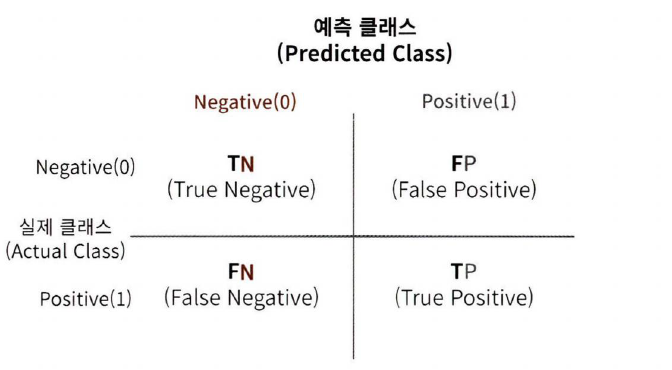

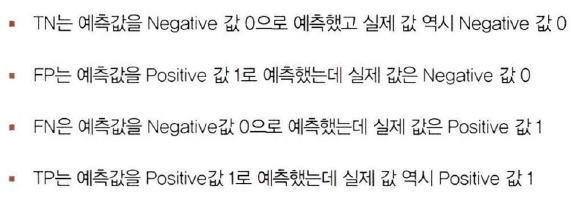

사이킷런에선 오차 행렬을 구하기 위해 confusion_matrix() API 제공

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros( (len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits( )를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)

In [17]:
#MyFakeClassifier의 예측 결과인 fakepred와 실제 결과인 y_test를 confusion_matrix()의 인자로 입력해 오차 행렬 출력
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]])

TN은 array[0,0]으로 405,

FP은 array[0,1]으로 0,

FN은 array[1,0]으로 45,

TP은 array[1,1]으로 0

(MNIST에서 7만 True -> 0이 405건, 1이 45건)

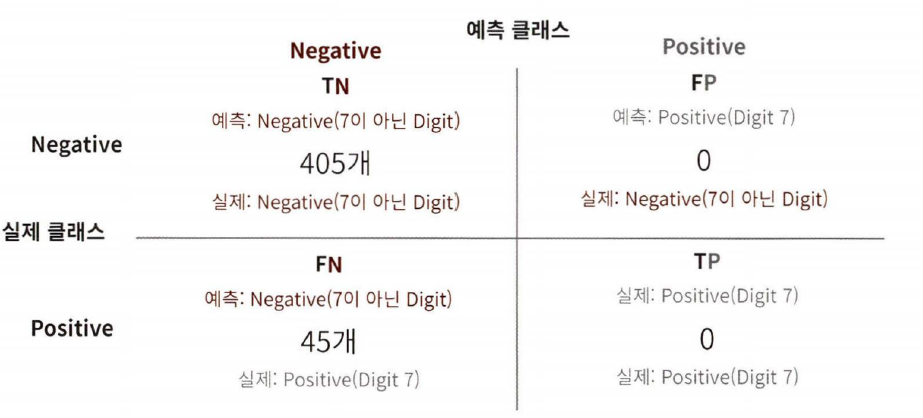

정확도는 오차 행렬에서 True에 해당하는 값인 TN, TP에만 좌우됨(예측값과 실제값이 얼마나 동일한가)

**정확도 = 예측 결과와 실제 값이 동일한 건수/전체 데이터 수**

**= (TN + TP)/(TN + FP + FN + TP)**

일반적으로 이런 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 찾아야하는 적은 수의 결괏값에 Positive 1 부여.

-> Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향 발생

->TN은 매우 커지고 TP는 매우 작아짐(Negative로 예측하는 경향 강해져서)

->FN 매우 작고 FP(Positive로 예측하는 경우 작음) 매우 작음

=> 정확도는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적 판단 오류 일으킴

## **03 정밀도와 재현율**

---

: Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표

**정밀도 = TP / (FP + TP)**

**재현율 = TP / (FN + TP)**

**정밀도:**

예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

-Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표라 양성 예측도라고도 불림

**재현율:**

실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

-민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불림

이진 분류 모델의 업무 특성에 따라 특정 평가 지표가 더 중요한 지표로 간주될 수 있음

**재현율이 중요 지표인 경우:**

**실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**

예) 암환자, 금융 사기 적발 모델

정밀도가 중요 지표인 경우: 스팸메일 여부 판단 모델

재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제 Positive, 예측 Negative)를 낮추는 데, 정밀도는 FP를 낮추는 데 초점을 맞춤

->서로 보완적인 지표로 분류의 성능을 평가하는 데 적용됨

정밀도 계산 precision_score()

재현율 계산 recall_score()

(사이킷런 제공)

In [19]:
#타이타닉 예제-오차 행렬, 정확도, 정밀도, 재현율 모두 구해서 예측 성능 평가해보기
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:4f}'.format(accuracy, precision, recall))

In [30]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)
  return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'],axis=1, inplace=True)
  return df

#레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

#데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [31]:
#로지스틱 회귀 기반으로 타이타닉 생존자 예측하고 평가 수행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도 : 0.7742, 재현율: 0.786885


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 정밀도/재현율 트레이드오프

---

분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치 높일 수 있음

하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 떄문에

어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움

=정밀도/재현율의 트레이드오프(Trade-dff)

사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해

<u>먼저 개별 레이블별로 결정확률을 구하고 예측 확률이 큰 레이블값으로 예측함</u>

일반적으로 이진 분류에서는 이 임곗값을 0.5로 정하고 이보다 확률이 크면 Positive, 작으면 Negative로 결정

사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba( ) 제공

학습이 완료된 사이킷런 Classifier 객체에서 호출 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함

predict( ) 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과임

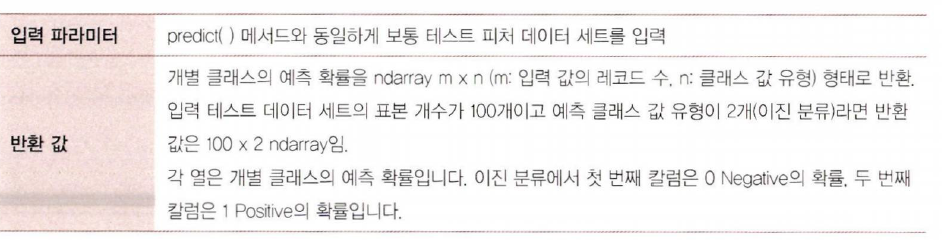

이진 분류에서 predict_proba( )를 수행해 반환되는 ndarray는

첫번째 칼럼이 클래스 값 0에 대한 예측 확률,

두번째 칼럼이 클래스 값 1에 대한 예측확률임

In [34]:
#타이타닉 생존자 데이터를 학습한 LogisticRegression 객체에서 predict_proba()와 predict()의 반환값 비교
pred_proba = lr_clf.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫번째 칼럼값과 두번째 칼럼값의 합은 1

두 개의 칼럼 중 더 큰 확률 값으로 predict( ) 메서드가 최종 예측

predict( ) 메서드는 predict_proba( ) 메서드에 기반해 생성된 API.

predict( )는 predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어있는 칼럼의 위치(첫번쨰 칼럼 또는 두번째 칼럼)를 받아서 최종적으로 예측 클래스를 결정하는 API

사이킷런의 정밀도/재현율 트레이드오프 방식 이해해보기

사이킷런의 predict( )는 predict_proba( ) 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임곗값(바로 앞에서는 0.5였음)을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정한다고 했음

이러한 구현을 위해 사이킷런의 Binarizer 클래스를 이용

다음 예제는 threshold 변수를 특정 값으로 설정한 뒤 Binarizer 클래스를 객체로 생성

생성된 Binarizer 객체의 fit_transform( ) 메서드를 이용해 넘파이 ndarray를 입력하면

입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환함

In [35]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1, 2],
     [ 2, 0, 0],
     [ 0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


입력된 X 데이터 세트에서 Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환됨을 알 수 있음

이제 이 Binarizer를 이용해 사이킷런 predict( )의 의사(pseudo) 코드 만들기

바로 앞 예지의 LogisticRegression 객체의 predict_proba( ) 메서드로 구한 각 클래스별 예측 확률값인 pred_proba 객체 변수에 분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer 클래스를 적용해 최종 예측값을 구하는 방식

이렇게 구한 최종 예측값에 대해 get_clf_eval( ) 함수를 적용해 평가 지표도 출력하기

In [36]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도 : 0.7742, 재현율: 0.786885


이 의사 코드로 계산된 평가지표가 앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier 객체에서 호출된 predict()로 계산된 지표값과 정확히 같음

->predict()가 predict_proba()에 기반함을 알 수 있음

In [37]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4

# predict_proba() 반환값의 두번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도 : 0.7183, 재현율: 0.836066


임곗값을 낮추니 재현율이 올라가고 정밀도가 떨어짐.

분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 되므로

더 낮은 확률로 Positive로 예측을 하면 True 값이 더 많아짐

->상대적으로 재현율 값이 높아짐

(양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문)

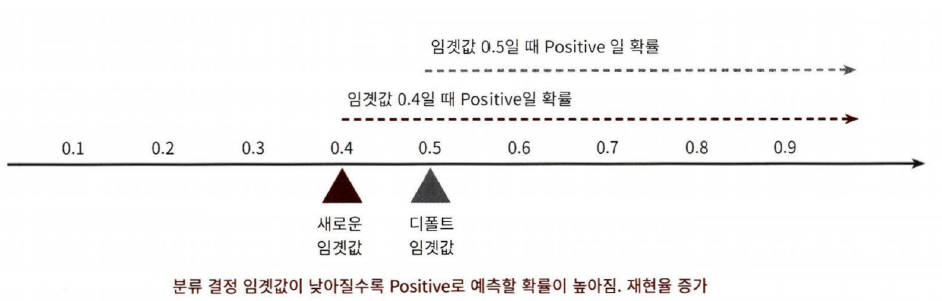

In [38]:
# 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가 지표를 조사해보기

#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도 : 0.7183, 재현율: 0.836066
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도 : 0.7656, 재현율: 0.803279
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도 : 0.7742, 재현율: 0.786885
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도 : 0.8364, 재현율: 0.754098
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도 : 0.8824, 재현율: 0.737705


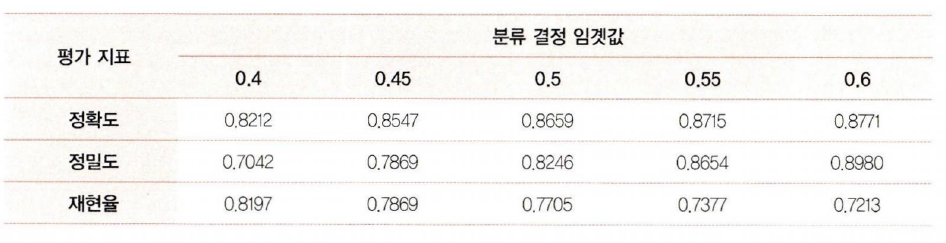

임곗값 변화에 따른 평가 지표 값을 알아보는 코드 작성했음

사이킷런은 이와 유사한 precision_recall_curve( ) API 제공.

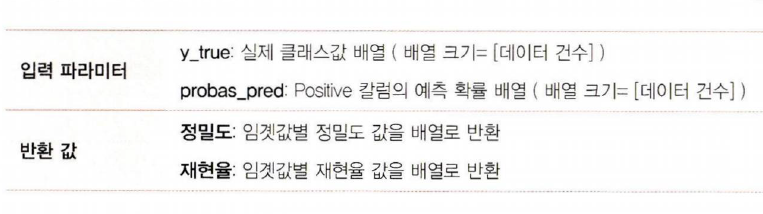

In [39]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 떄의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


추출된 임곗값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면

임곗값이 증가할수록 정밀도값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있음

precision_recall_curve( ) API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는 데 이용 가능

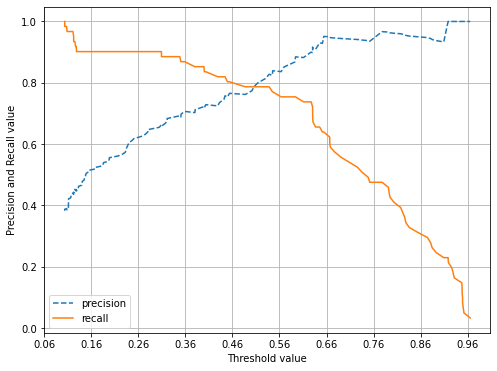

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
% matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  #threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

정밀도는 점선으로, 재현율은 실선으로 표현함

임곗값이 낮을수록 많은 수의 양성예측으로 인해

재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐

## **04 F1 스코어**

---

F1 스코어는 정밀도와 재현율을 결합한 지표

정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

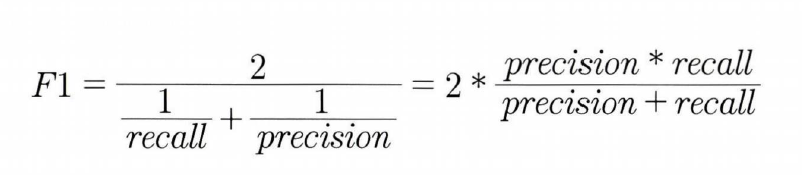

사이킷런은 F1 스코어를 구하기 위해 f1_score()라는 API 제공함

이를 이용해 정밀도와 재현율 절의 예제에서 학습/예측한 로지스틱 회귀 기반 타이타닉 생존자 모델의 F1 스코어를 구해보기

In [41]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


이번에는 타이타닉 생존자 예측에서 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표 구해보기

In [42]:
def get_clf_eval(y_test,pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test,pred)
  #F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  #f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy,precision,recall,f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036


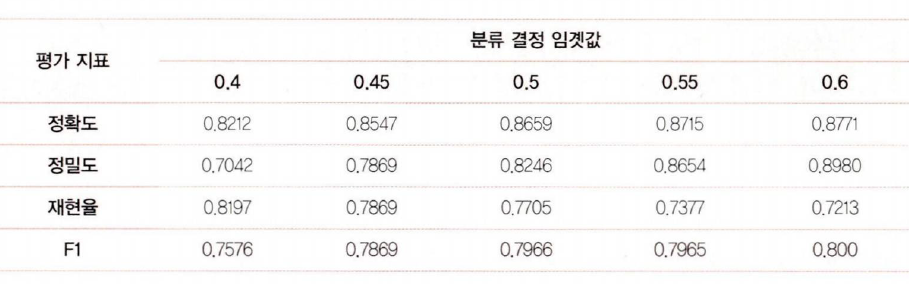

F1 스코어는 임곗값이 0.6일 때 가장 좋은 값을 보여줌

## **05 ROC 곡선과 AUC**

---

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표

ROC 곡선(Receiver Operation Characteristic Curve)(수신자 판단 곡선)

ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선

FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타남

TPR(True Positive Rate) = 재현율

=TP / (FN + TP)

TPR, 즉 재현율은 민감도로도 불림

민감도에 대응하는 지표로 TNR(True Negative Rate)이라고 불리는 특이성(Specificity)이 있음

**민감도(TPR)**는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준

(질병이 있는 사람은 질병이 있는 것으
로 양성판정).

**특이성(TNR)**은 실제값 Negative(음성》가 정확히 예측돼야 하는 수준

(질병이 없는 건강한 사람은 질병이
없는 것으로 음성 판정).

**FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성**

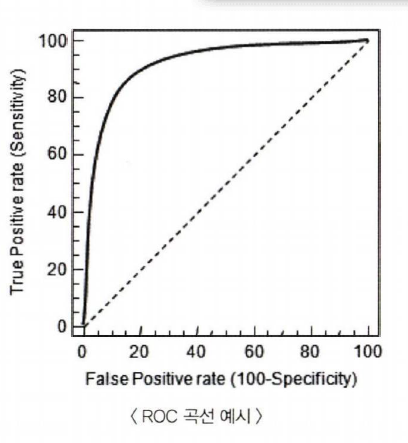

가운데 직선으 ROC 곡선의 최저값

왼쪽 하단과 오른쪽 상단을 대각선으로 이은 직선

동전을 무작위로 던져 앞/뒬르 맞추는 랜덤 수준의 이진 분류의 ROC 직선(AUC는 0.5)

ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지며, 멀어질수록 성능 뛰어남

ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함

FPR을 0부터 1까지 변경하는 방법: 앞에서 배운 분류 결정 임곗값을 변경

분류 결정 임곗값은 positive 예측값을 결정하는 확률의 기준이기 떄문에 FPR을 0으로 만들려면 임곗값을 1로 지정하면 됨

임곗값을 1로 지정하면 Positive 예측 기준이 매우 높기 때문에 분류기(Classifier)가 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없기 때문

FPR을 1로 만들려면 TN을 0으로 만들면 됨

TN을 0으로 만들려면 분류 결정 임곗값을 0으로 지정하면 됨. 분류기의 Positive 확률 기준이 너무 낮아서 다 Postiive로 예측됨

사이킷런은 ROC 곡선을 구하기 위해 roc_curve( ) API 제공

precision_recall_curve( ) API와 유사함

반환값이 FPR, TPR, 임곗값으로 구성되어 있을 뿐

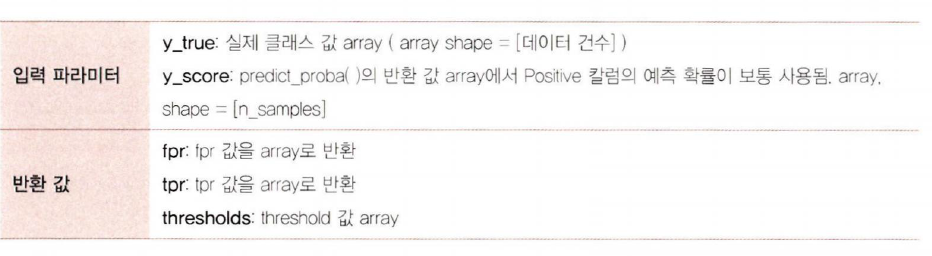

In [45]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 떄의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


roc_curve( )의 결과를 보면 임곗값이 1에 가까운 값에서 점점 작아지며 FPR이 점점 커지고 TPR은 가파르게 커짐

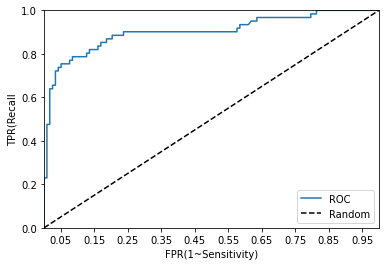

In [46]:
#FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화
def roc_curve_plot(y_test, pred_proba_c1):
  #임곗값에 따른 FPR, TPR 값을 반환받음
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  #ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs, tprs, label = 'ROC')
  # 가운데 대각선 직선을 그림
  plt.plot([0,1],[0,1], 'k--', label='Random')

  # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1~Sensitivity)'); plt.ylabel('TPR(Recall')
  plt.legend()

roc_curve_plot(y_test,pred_proba[:,1])

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np
print(confusion_matrix(y_test, pred))
print("정확도:", np.round(accuracy_score(y_test , pred), 4))
print("정밀도:", np.round(precision_score(y_test , pred),4))
print("재현율:", np.round(recall_score(y_test, pred), 4))

[[104  14]
 [ 13  48]]
정확도: 0.8492
정밀도: 0.7742
재현율: 0.7869


In [55]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)

  #ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  #ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy,precision, recall, f1, roc_auc))